In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_df, city_df, on="city", how="left")
merge_table.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [4]:
# City Type (Urban, Suburban, Rural)

urban_type = merge_table[merge_table["type"] == "Urban"].groupby([merge_table["city"]])
rural_type = merge_table[merge_table["type"] == "Rural"].groupby([merge_table["city"]])
suburban_type = merge_table[merge_table["type"] == "Suburban"].groupby([merge_table["city"]])

In [5]:
# Get x,y,s coordinates for city type - urban
x_urban = urban_type["ride_id"].count()
y_urban = urban_type["fare"].mean()
s_urban = urban_type["driver_count"].mean()

In [6]:
# Get x,y,s coordinates for city type - rural
x_rural = rural_type["ride_id"].count()
y_rural = rural_type["fare"].mean()
s_rural = rural_type["driver_count"].mean()

In [7]:
# Get x,y,s coordinates for city type - suburban
x_suburban = suburban_type["ride_id"].count()
y_suburban = suburban_type["fare"].mean()
s_suburban = suburban_type["driver_count"].mean()

## Bubble Plot of Ride Sharing Data

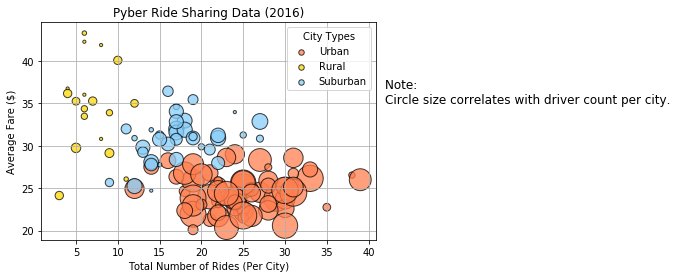

In [8]:
# Scatter plots for city types - urban, rural, suburban

plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Graph properties
# Create a title, x label, and y label for our chart
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save figure
plt.savefig("Output Images/BubblePlot.png")

# Show plot
plt.show()

## Total Fares by City Type

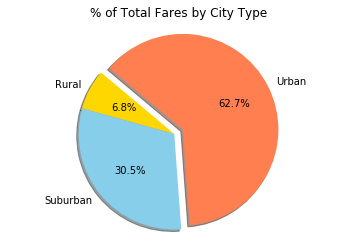

In [9]:

#Percentage of total fares per city type

# Calculate the overall fare
overallTotalFare = merge_table['fare'].sum()


# Total fares per city type
total_fare_perCityType = merge_table.groupby(['type'])['city','fare'].sum()
total_fare_perCityType.head()

#Percentage of total fares per city type
percentTotalFare = total_fare_perCityType*100/overallTotalFare


# Create a pie chart based upon the above data
city_type=['Rural','Suburban','Urban']
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.1)
plt.pie(percentTotalFare, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Output Images/PercentTotalFares.png")
plt.show()

## Total Rides by City Type

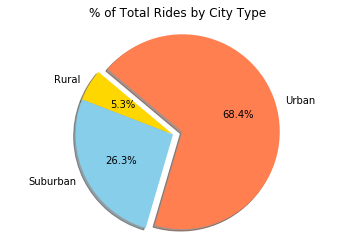

In [12]:
# Percentage of total rides per city type

# Calculate the overall rides
overallTotalRides = merge_table['ride_id'].count()


# Total rides per city type
total_rides_perCityType = merge_table.groupby(['type'])['ride_id'].count()
#total_fare_perCityType.head()

#Percentage of total rides per city type
percentTotalRides = total_rides_perCityType*100/overallTotalRides


# Create a pie chart based upon the above data
city_type=['Rural','Suburban','Urban']
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.1)
plt.pie(percentTotalRides, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Output Images/PercentTotalRides.png")
plt.show()


## Total Drivers by City Type

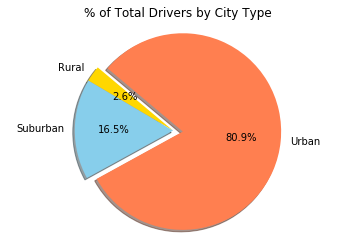

In [13]:
# Percentage of total drivers per city type

# Calculate the overall drivers
overallTotalDrivers = city_df['driver_count'].sum()


# Total drivers per city type
total_drivers_perCityType = city_df.groupby(['type'])['driver_count'].sum()
#total_fare_perCityType.head()

#Percentage of total rides per city type
percentTotalDrivers = total_drivers_perCityType*100/overallTotalDrivers


# Create a pie chart based upon the above data
city_type=['Rural','Suburban','Urban']
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.1)
plt.pie(percentTotalDrivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("Output Images/PercentTotalDrivers.png")
plt.show()
